<a href="https://colab.research.google.com/github/sumandutta8877/DATA-Analytics/blob/Jeel/DA_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data from GitHub

In [1]:
!git clone 'https://github.com/sumandutta8877/Data_DA.git'    # Run this Line for only one time

Cloning into 'Data_DA'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [2]:
import pandas as pd
df_train = pd.read_csv('/content/Data_DA/Data/Train_data.csv')
df_test = pd.read_csv('/content/Data_DA/Data/Test_data.csv')
df_sample = pd.read_csv('/content/Data_DA/Data/Sample_submission.csv')

df1 = df_train            # df1 is the training dataframe
df2 = df_test             # df2 is the test dataframe

# Start Processing

In [3]:
df1.columns

Index(['id', 'acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'release_date', 'speechiness', 'tempo', 'valence', 'year',
       'duration-min', 'popularity'],
      dtype='object')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC

In [5]:
labels = dict(zip([1,2,3,4,5],df1['popularity'].unique()))
labels

{1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}

In [6]:
df1.loc[(df1['popularity']=='very low'), 'label'] = 1
df1.loc[(df1['popularity']=='low'), 'label'] = 2
df1.loc[(df1['popularity']=='average'), 'label'] = 3
df1.loc[(df1['popularity']=='high'), 'label'] = 4
df1.loc[(df1['popularity']=='very high'), 'label'] = 5

In [7]:
df1['label']

0        1.0
1        2.0
2        1.0
3        2.0
4        3.0
        ... 
12222    3.0
12223    5.0
12224    2.0
12225    4.0
12226    4.0
Name: label, Length: 12227, dtype: float64

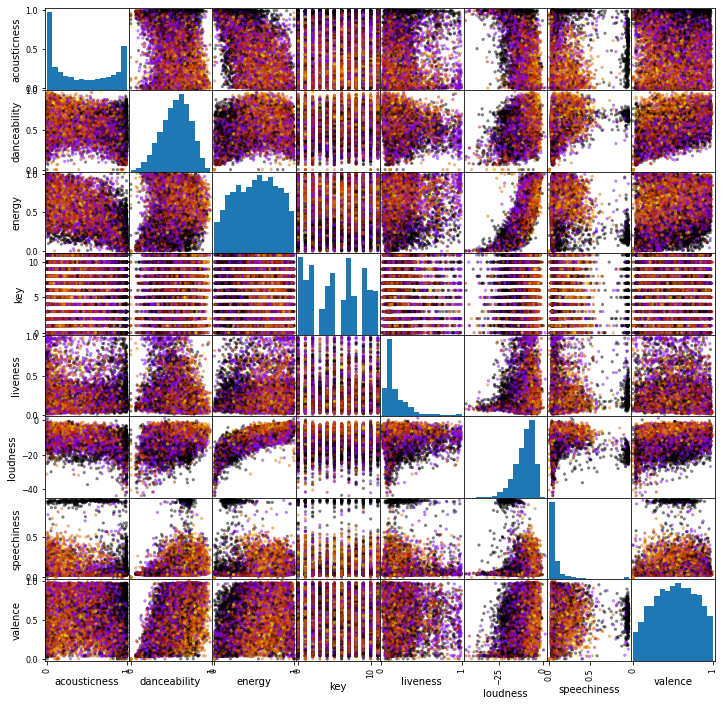

In [8]:

features1 = ['acousticness', 'danceability', 'energy', 'explicit','key', 'liveness', 'loudness', 'speechiness', 'valence']
X_train = df1[features1]
y_train = df1['label']

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train,c=y_train,s=40,hist_kwds={'bins':15},figsize=(12,12),cmap=cmap)

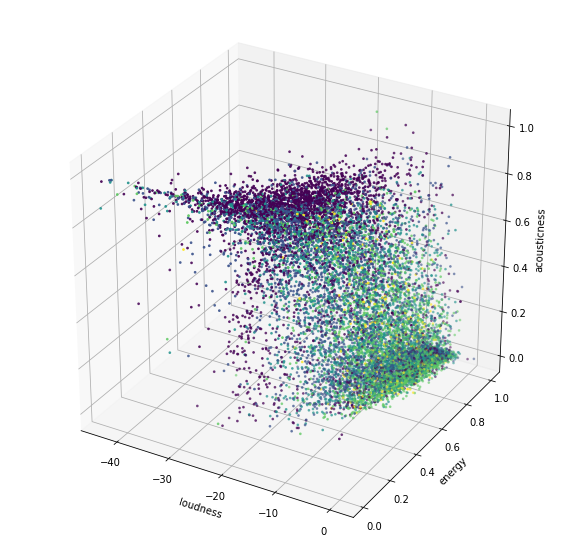

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X_train['loudness'],X_train['energy'],X_train['acousticness'], c=y_train,s=3)
ax.set_xlabel('loudness')
ax.set_ylabel('energy')
ax.set_zlabel('acousticness')
plt.show()
#['loudness','energy','speechinesss']

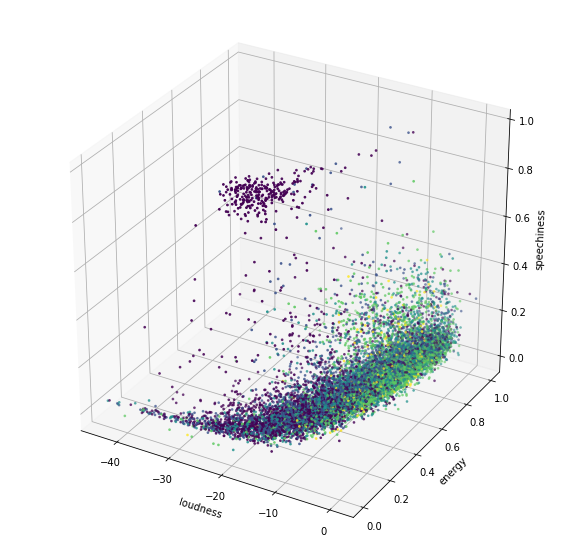

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X_train['loudness'],X_train['energy'],X_train['speechiness'], c=y_train,s=3)
ax.set_xlabel('loudness')
ax.set_ylabel('energy')
ax.set_zlabel('speechiness')
plt.show()
#['loudness','energy','speechinesss']

# **LSVM with different regularization parameter**

In [18]:
list=[['energy','loudness'],['energy','speechiness'],['loudness','speechiness']]
len(list)

3

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

list=[['energy','loudness'],['energy','speechiness'],['loudness','speechiness']]


#cin=[0.1,1,5,10,100]
for i in range(len(list)):
  X_train1=df1[list[i]]
  clf = LinearSVC(C=1,random_state=67).fit(X_train1,y_train)
  #print("Coefficient:\n",clf.coef_)
  #print("Intercepts:\n",clf.intercept_)

  plt.figure(figsize=(5,5))
  plt.scatter(X_train1[list[i][0]],X_train1[list[i][1]],c=y_train,edgecolor='black',alpha=0.7)
  x_range = np.linspace(-10,15)
  for w, b, color in zip(clf.coef_,clf.intercept_,['red','green','blue','yellow','black']):
    plt.plot(x_range, -(x_range * w[0] + b) / w[1],c=color,alpha=0.8)
  plt.legend(df1["popularity"].unique().tolist())
  #plt.title('C = {:.2f}'.format(i))
  plt.title('for [{},{}]'.format(list[i][0],list[i][1]))
  plt.xlabel(list[i][0])
  plt.ylabel(list[i][1])
  plt.xlim(-5,5)
  plt.ylim(-200,200)
  plt.show()


# **Kernelized SVM  with diff kernels,gamma parameters**

In [ ]:
#remember to apply minMaxScaler before training a model.